In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


colbert_df = pd.read_csv('../data/chatgpt-27062023-positions-colbert.csv')
iterDict_df = pd.read_csv('../data/chatgpt-27062023-positions-IterDict.csv')

# replace position -1 with nan
colbert_df['position'] = colbert_df['position'].replace(-1, np.nan)
iterDict_df['position'] = iterDict_df['position'].replace(-1, np.nan)

# reaname 'OA_SFT_Llama_30B_7_clean_queries' to 'ColBERT'
colbert_df['llm'] = colbert_df['llm'].replace('OA_SFT_Llama_30B_7_clean_queries', 'OA_SFT_Llama_30B')
iterDict_df['llm'] = iterDict_df['llm'].replace('OA_SFT_Llama_30B_7_clean_queries', 'OA_SFT_Llama_30B')

# rename Falcon-7b-instruct_long
colbert_df['llm'] = colbert_df['llm'].replace('Falcon-7b-instruct_long', 'falcon7b_instruct')
iterDict_df['llm'] = iterDict_df['llm'].replace('Falcon-7b-instruct_long', 'falcon7b_instruct')

# set position to 50 if position is over 50
colbert_df.loc[colbert_df['position'] > 50, 'position'] = 50
iterDict_df.loc[iterDict_df['position'] > 50, 'position'] = 50

In [20]:
# for each row, compare the position between colbert and iterDict and calculate the difference
colbert_df['position_diff'] = colbert_df['position'] - iterDict_df['position']


In [21]:
# get the rows with big difference
colbert_df['IterDict_position'] = iterDict_df['position']
colbert_df['position_diff_abs'] = colbert_df['position_diff'].abs()
colbert_df = colbert_df.sort_values(by=['position_diff_abs'], ascending=True)
colbert_df.head(10)

,qid,query,llm,docno,position,chatgpt_answer,best_answer_if_not_llm,position_diff,IterDict_position,position_diff_abs
354,116,outcome prostate cancer,chatgpt_clean_queries,chatgpt_clean_queries116,6.0,As an AI language model I cannot have a perso...,NaN,0.0,6.0,0.0
37,45,Can diabetes be cured?,OA_SFT_Llama_30B,OA_SFT_Llama_30B_7_clean_queries45,50.0,The causes of autism spectrum disorder (ASD) a...,NaN,0.0,50.0,0.0
436,131,exercises for better posture,chatgpt,chatgpt131,50.0,1. Shoulder Rolls - Stand with your arms by yo...,NaN,0.0,50.0,0.0
322,112,symptoms of asthma,OA_SFT_Llama_30B,OA_SFT_Llama_30B_7_clean_queries112,50.0,I'm sorry to hear that you have been diagnosed...,NaN,0.0,50.0,0.0
40,45,Can diabetes be cured?,open-llama-13b,open-llama-13b45,0.0,I believe that diabetes can be cured. Q: How ...,NaN,0.0,0.0,0.0
41,45,Can diabetes be cured?,open-llama-13b_k50,open-llama-13b_k5045,50.0,It can be managed. Q: What are the most common...,NaN,0.0,50.0,0.0
228,94,When will I start to feel better with multiple...,open-llama-13b_k50,open-llama-13b_k5094,50.0,Multiple Sclerosis is a disease that affects t...,NaN,0.0,50.0,0.0
435,131,exercises for better posture,chatgpt_clean_queries,chatgpt_clean_queries131,50.0,1. Shoulder blade squeeze: Sit up straight and...,NaN,0.0,50.0,0.0
433,131,exercises for better posture,open-llama-13b,open-llama-13b131,50.0,Stand with your feet together and your knees f...,NaN,0.0,50.0,0.0
425,130,neck and shoulder stretches,open-llama-13b_k50,open-llama-13b_k50130,50.0,Stretching is beneficial. Q: Where should you...,NaN,0.0,50.0,0.0


In [22]:
# group by llm and get mean and std of position, as well as count of value 0.0 in position

colbert_df_grouped = colbert_df.groupby('llm').agg({'position': ['mean', 'std']})
colbert_df_grouped['position_0_count'] = colbert_df[colbert_df['position'] == 0.0].groupby('llm').agg({'position': 'count'})
iterDict_df_grouped = iterDict_df.groupby('llm').agg({'position': ['mean', 'std']})
iterDict_df_grouped['position_0_count'] = iterDict_df[iterDict_df['position'] == 0.0].groupby('llm').agg({'position': 'count'})

# rename columns
colbert_df_grouped.columns = ['_'.join(col) for col in colbert_df_grouped.columns.values]
iterDict_df_grouped.columns = ['_'.join(col) for col in iterDict_df_grouped.columns.values]

In [23]:
colbert_df_grouped.head(10)

,position_mean,position_std,position_0_count_
llm,,,
OA_SFT_Llama_30B,19.229167,19.562491,2
chatgpt,6.600000,12.969480,9
chatgpt_clean_queries,7.345455,13.989703,6
falcon40b_instruct,6.642857,12.804004,5
falcon40b_prompt,9.727273,13.879714,3
falcon7b_instruct,8.940000,14.627916,14
falcon7b_prompt,3.927273,3.843487,9
open-llama-13b,18.423077,19.192877,5
open-llama-13b_k50,26.716981,20.937064,1


In [24]:
iterDict_df_grouped.head(10)    

,position_mean,position_std,position_0_count_
llm,,,
OA_SFT_Llama_30B,34.066667,20.083236,1
chatgpt,15.320755,20.358115,5
chatgpt_clean_queries,17.192308,20.143640,8
falcon40b_instruct,29.589744,20.573000,1
falcon40b_prompt,31.166667,20.739853,4
falcon7b_instruct,24.638298,20.236026,2
falcon7b_prompt,19.800000,19.174057,2
open-llama-13b,21.490196,22.446712,10
open-llama-13b_k50,31.562500,20.755831,2


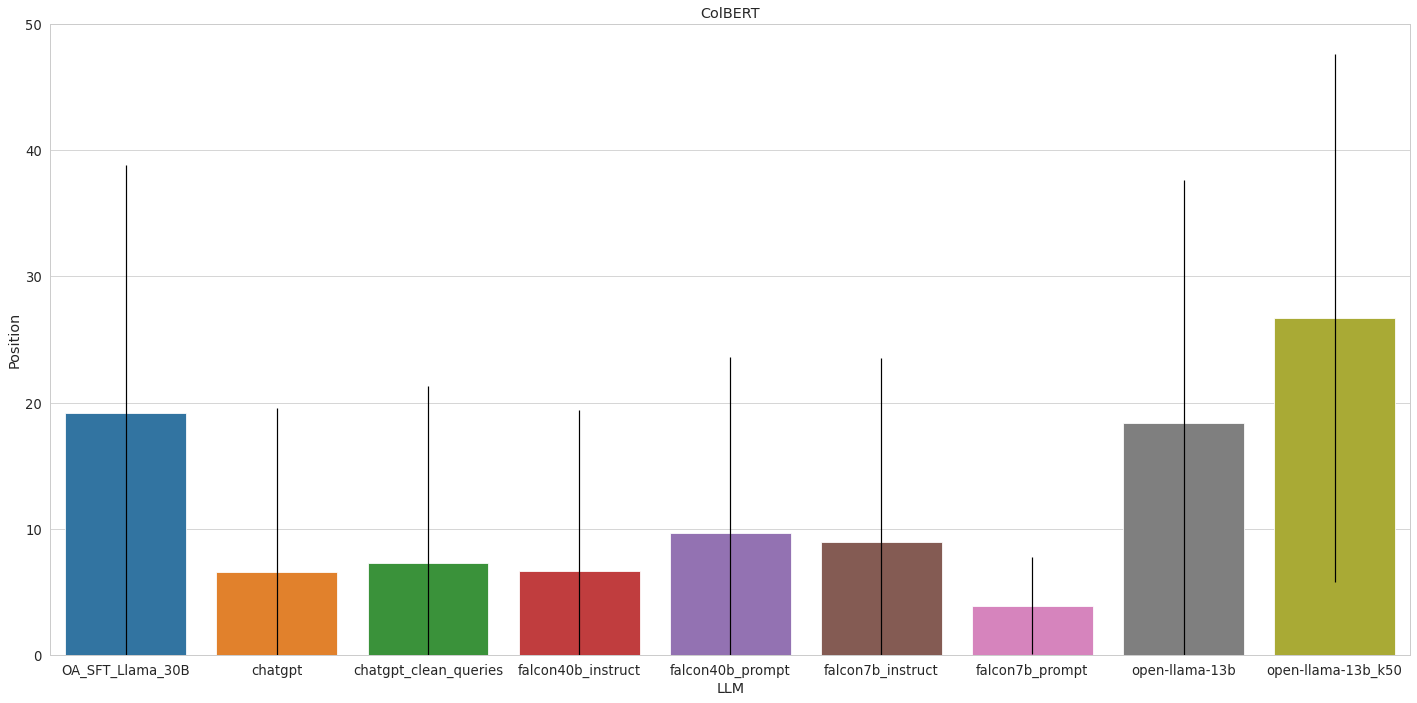

In [25]:
# plot positions for each dataframe
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=colbert_df_grouped.index, y='position_mean', data=colbert_df_grouped, yerr=colbert_df_grouped['position_std'])
ax.set_title('ColBERT')
ax.set_xlabel('LLM')
ax.set_ylabel('Position')
# set y axis to start at 0 and end at 500
ax.set_ylim(0, 50)
# fix x axis labels being cut off and overlapping

plt.tight_layout()

plt.show()

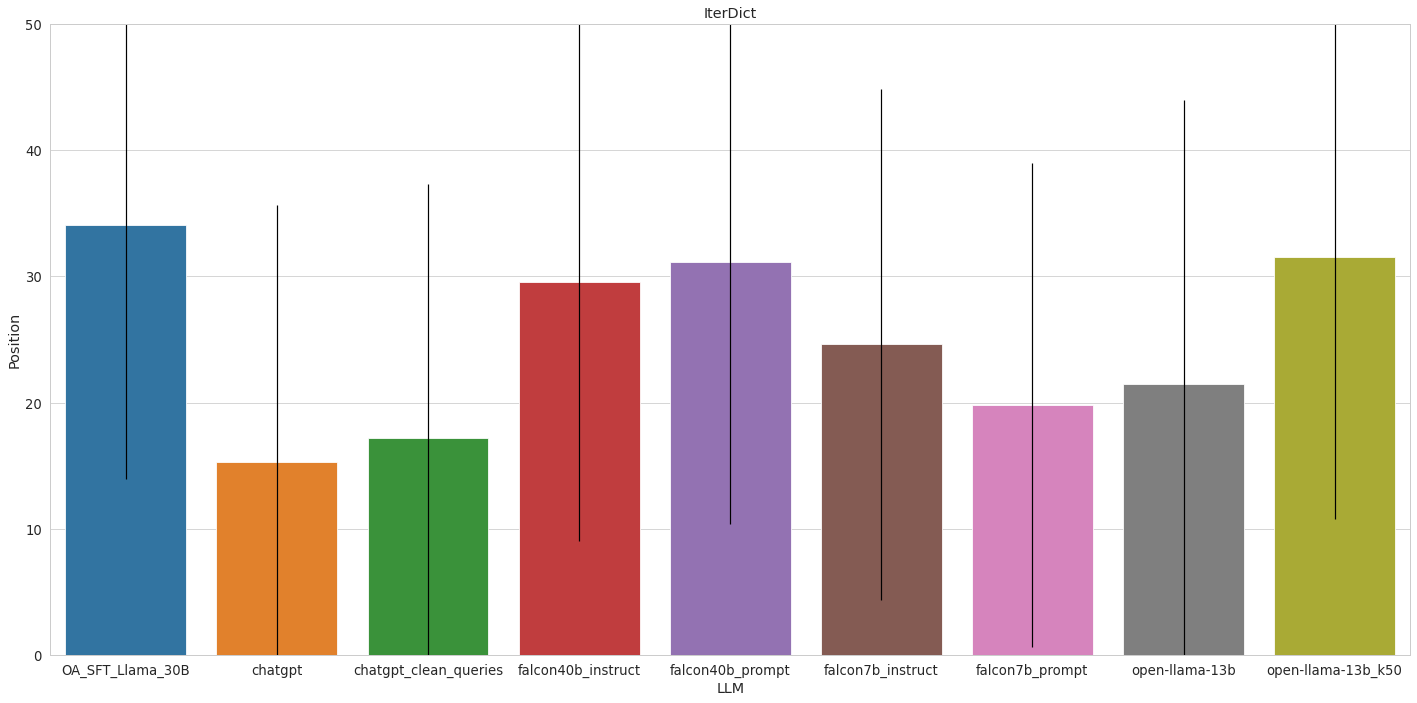

In [26]:
# same plot for IterDict
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=iterDict_df_grouped.index, y='position_mean', data=iterDict_df_grouped, yerr=iterDict_df_grouped['position_std'])
ax.set_title('IterDict')
ax.set_xlabel('LLM')
ax.set_ylabel('Position')
# set y axis to start at 0 and end at 500
ax.set_ylim(0, 50)
# fix x axis labels being cut off and overlapping
plt.tight_layout()
plt.show()

In [27]:
# get all results of chatgpt_clean_queries, order by position
chatgpt_clean_queries_df = result_df[result_df['llm'] == 'chatgpt_clean_queries']
chatgpt_clean_queries_df = chatgpt_clean_queries_df.sort_values(by=['position'])
chatgpt_clean_queries_df

NameError: name 'result_df' is not defined

In [ ]:
# get text result of query 267
chatgpt_clean_queries_df[chatgpt_clean_queries_df['qid'] == 114]['chatgpt_answer'].values[0]

'1. Intense and unstable emotional experiences  2. Extreme fear of abandonment or rejection  3. Unstable and intense interpersonal relationships  4. Impulsive behavior (substance abuse  binge eating  reckless driving)  5. Self-harm or suicidal behavior  6. Chronic feelings of emptiness  7. Unstable self-image or sense of identity  8. Intense anger and difficulty controlling emotions  9. Paranoia or dissociation  10. Inability to maintain a stable job or secure living situation.'